In [22]:
import numpy as np
import os
import math
import cv2
import matplotlib.pyplot as plt
import time

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [29]:
ImagePath = '/content/drive/My Drive/Colab Notebooks/CellTracking/MSC Diplomamunka/New segmentation methods/Random test images/'
TestImages = os.listdir(ImagePath)
TestImages.sort()

for ImageName in TestImages:
  print(ImageName)

BIBF_01_14_284.jpg
BIBF_01_5_283.jpg
BIBF_20170509_1_38.jpg
BRAF10_1_150.jpg
ZBMelanoma_01_1_101.jpg
aktivin01_1_306.jpg
zometa01_3_18.jpg
zometa01_3_495.jpg
zometa01_3_908.jpg


In [159]:
#Light and dark cells

for ImageName in TestImages:
  Img = cv2.cvtColor(cv2.imread(ImagePath+ImageName), cv2.COLOR_BGR2GRAY)

  #Distance from gray

  DistImg = np.zeros_like(Img)
  DistImg[...] = abs(Img[...].mean()-Img[...])
  DistImg = ((DistImg/DistImg[...].max()*255).astype(np.uint8))
  #DistImg = cv.blur(DistImg, ksize = (5,5))
  #DistImg = cv2.dilate(DistImg, cv2.getStructuringElement(cv2.MORPH_RECT,(8,8)))

  #Treshold used so far

  Tresh = ((DistImg>50)*255).astype(np.uint8)

  #Adaptive Treshold
  
  ADTresh = cv.adaptiveThreshold(DistImg,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,101,8)

  plt.figure(figsize=(20,5))
  plt.subplot(1,4,1)
  plt.imshow(Img, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,4,2)
  plt.imshow(DistImg, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,4,3)
  plt.imshow(Tresh, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,4,4)
  plt.imshow(ADTresh, cmap='gray', vmin=0, vmax=255)
  

Output hidden; open in https://colab.research.google.com to view.

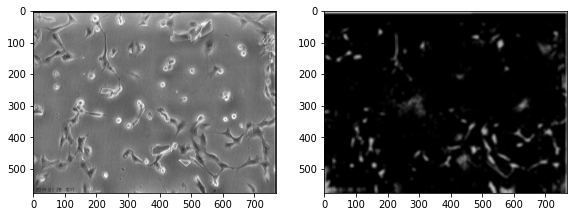

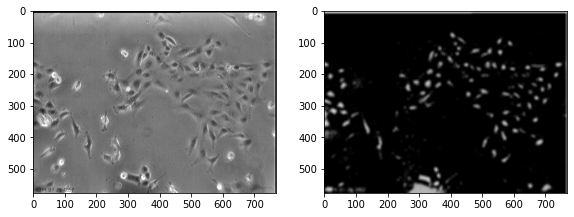

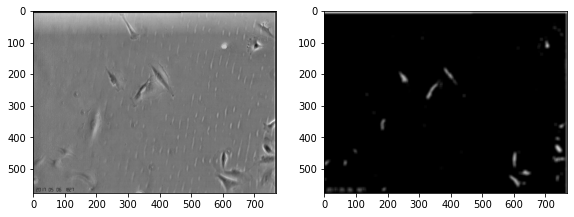

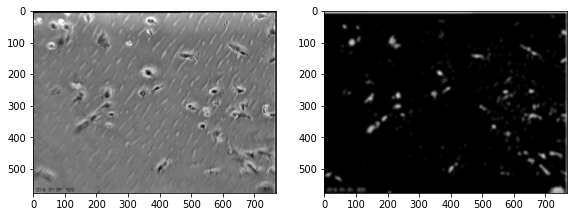

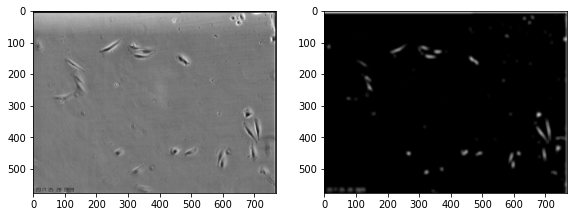

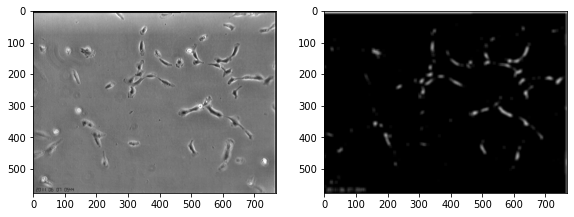

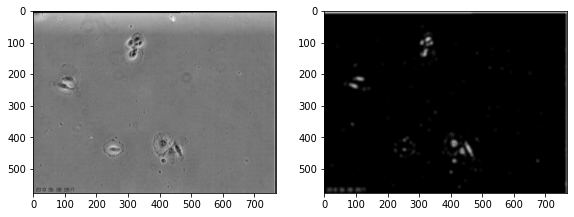

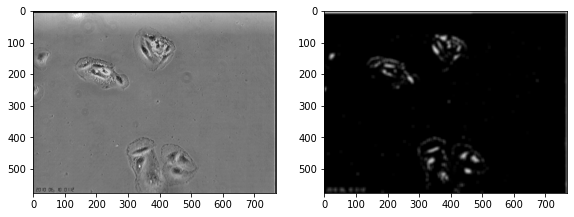

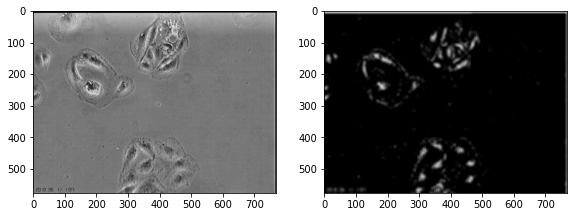

In [132]:
#Only dark cells

for ImageName in TestImages:
  Img = cv2.cvtColor(cv2.imread(ImagePath+ImageName), cv2.COLOR_BGR2GRAY)

  #Dark treshold
  THImg = 255-Img
  ret,THImg = cv.threshold(THImg,160,255,cv.THRESH_TOZERO)
  THImg = ((THImg/THImg[...].max()*255).astype(np.uint8))
  THImg = cv.blur(THImg, ksize = (10,10))
  #THImg = cv2.dilate(THImg, cv2.getStructuringElement(cv2.MORPH_RECT,(8,8)))

  #Treshold used so far

  #Tresh = ((DistImg>70)*255).astype(np.uint8)

  #Morphological operations


  plt.figure(figsize=(20,5))
  plt.subplot(1,4,1)
  plt.imshow(Img, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,4,2)
  plt.imshow(THImg, cmap='gray', vmin=0, vmax=255)


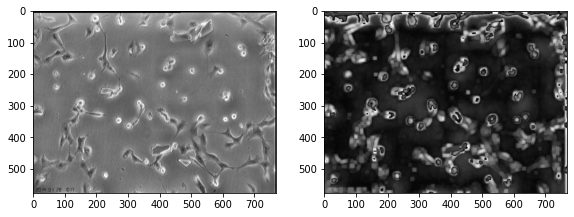

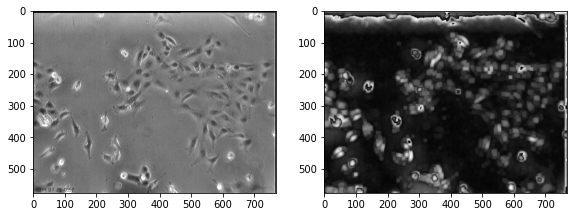

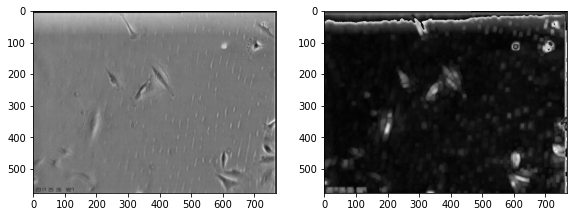

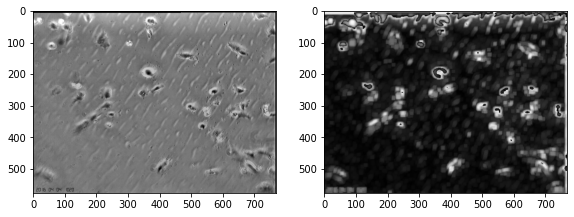

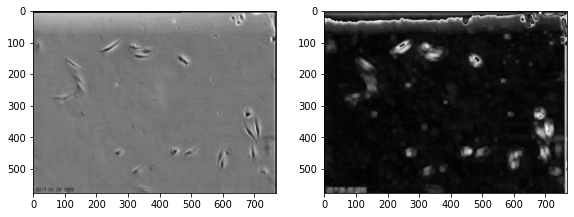

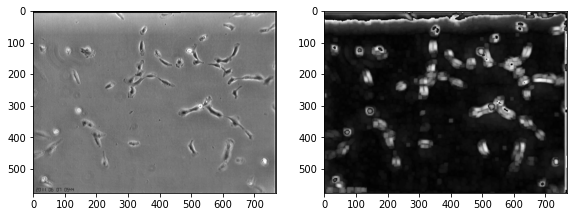

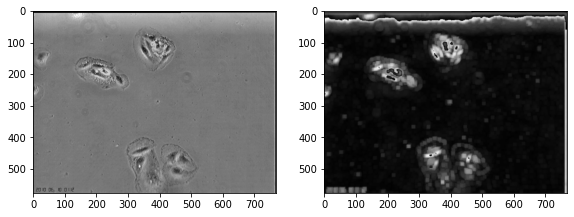

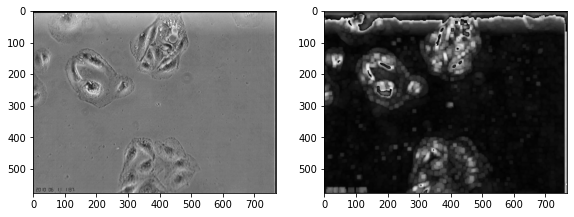

In [158]:
#Combined mode

for ImageName in TestImages:
  Img = cv2.cvtColor(cv2.imread(ImagePath+ImageName), cv2.COLOR_BGR2GRAY)

  #Distance from gray

  DistImg = np.zeros_like(Img)
  DistImg[...] = abs(Img[...].mean()-Img[...])
  DistImg = cv.blur(DistImg, ksize = (5,5))
  DistImg = cv2.dilate(DistImg, cv2.getStructuringElement(cv2.MORPH_RECT,(8,8)))
  DistImg = ((DistImg/DistImg[...].max()*255).astype(np.uint8))

  #Light treshold

  THImg = Img
  ret,THImg = cv.threshold(THImg,160,255,cv.THRESH_TOZERO)
  THImg = ((THImg/THImg[...].max()*255).astype(np.uint8))
  THImg = cv.blur(THImg, ksize = (10,10))

  #Weighted sum

  SImg = DistImg+THImg
  SImg = cv.morphologyEx(SImg, cv.MORPH_OPEN, opening_kernel)
  SImg = ((SImg/SImg[...].max()*255).astype(np.uint8))


  plt.figure(figsize=(20,5))
  plt.subplot(1,4,1)
  plt.imshow(Img, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,4,2)
  plt.imshow(SImg, cmap='gray', vmin=0, vmax=255)


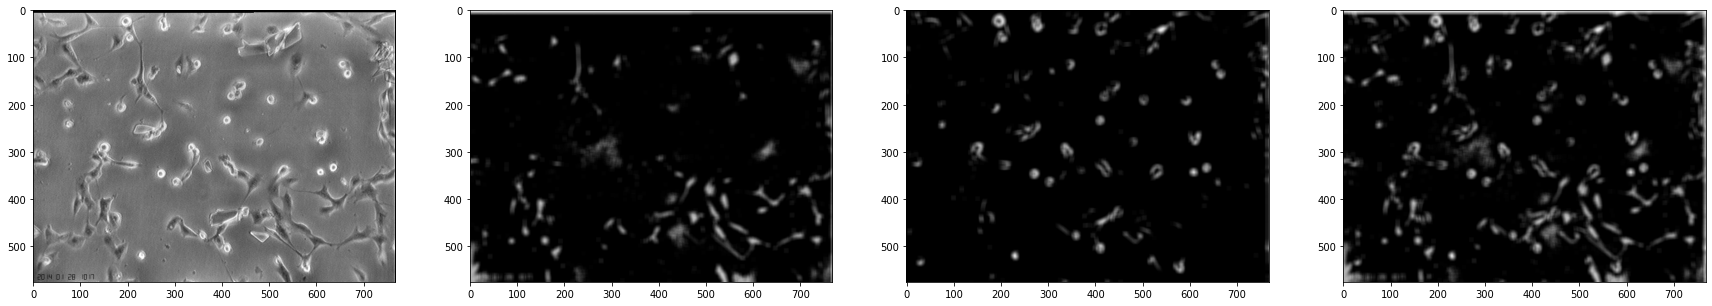

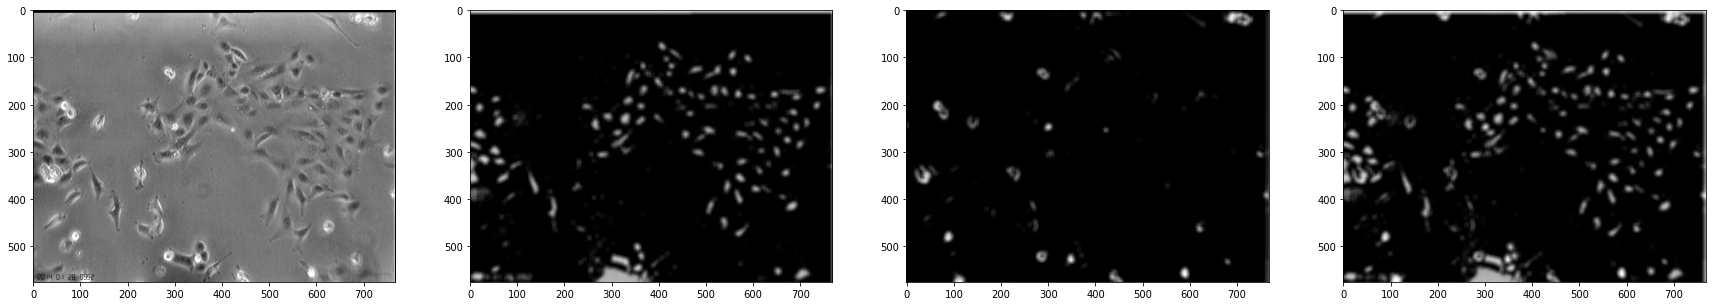

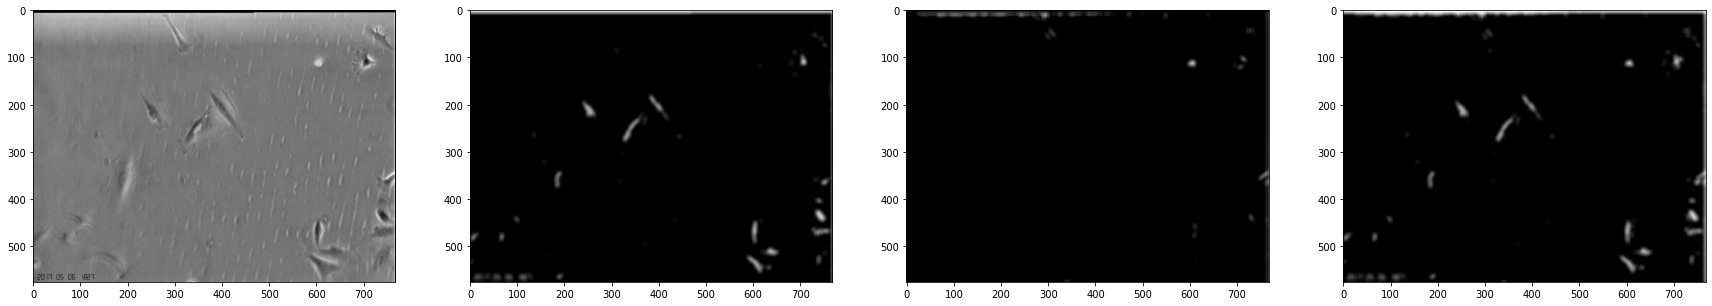

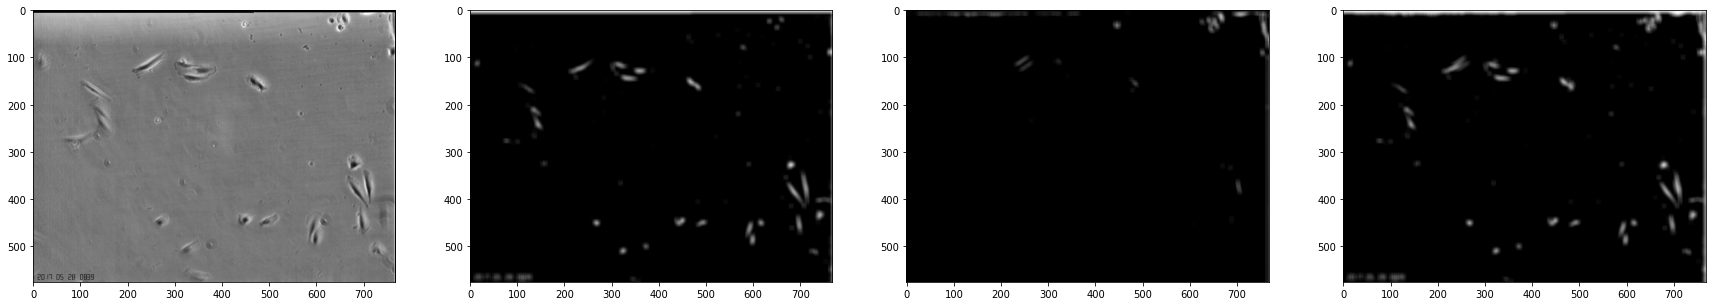

In [176]:
#Dark and light with different boundaries

for ImageName in TestImages:
  Img = cv2.cvtColor(cv2.imread(ImagePath+ImageName), cv2.COLOR_BGR2GRAY)

  #Dark treshold
  DImg = 255-Img
  ret,DImg = cv.threshold(DImg,160,255,cv.THRESH_TOZERO)
  DImg = ((DImg/DImg[...].max()*255).astype(np.uint8))
  DImg = cv.blur(DImg, ksize = (10,10))

  #Light treshold
  LImg = Img
  ret,LImg = cv.threshold(LImg,190,255,cv.THRESH_TOZERO)
  LImg = ((LImg/LImg[...].max()*255).astype(np.uint8))
  LImg = cv.blur(LImg, ksize = (10,10))

  #Combined image
  CImg = DImg+LImg
  CImg = ((CImg/CImg[...].max()*255).astype(np.uint8))

  plt.figure(figsize=(30,5))
  plt.subplot(1,4,1)
  plt.imshow(Img, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,4,2)
  plt.imshow(DImg, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,4,3)
  plt.imshow(LImg, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,4,4)
  plt.imshow(CImg, cmap='gray', vmin=0, vmax=255)

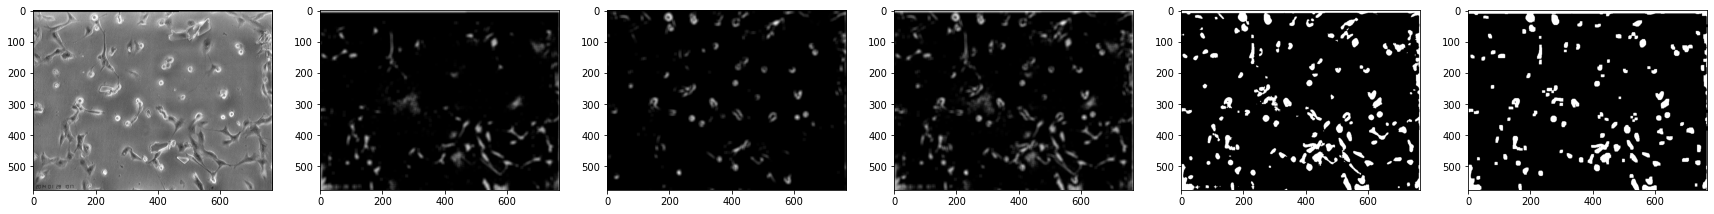

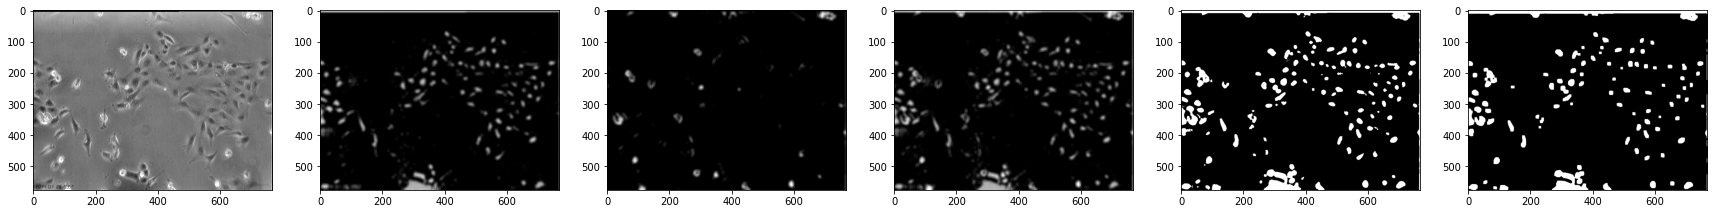

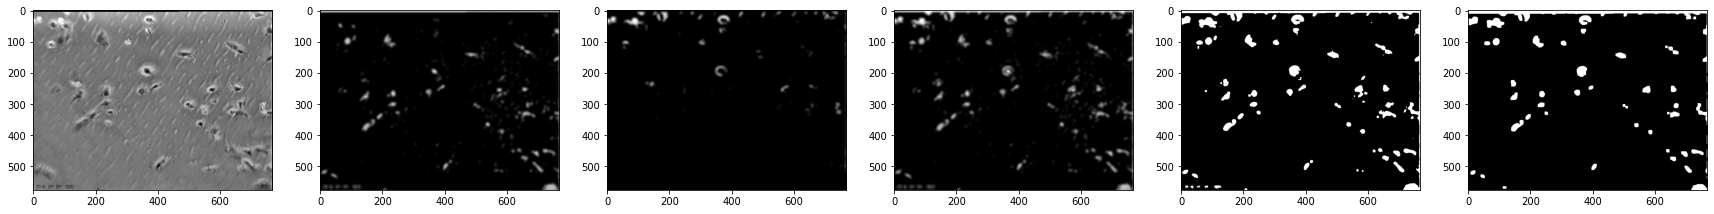

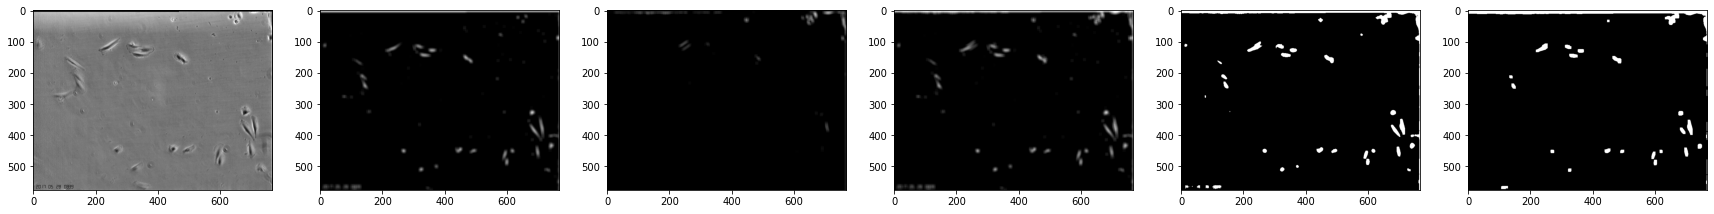

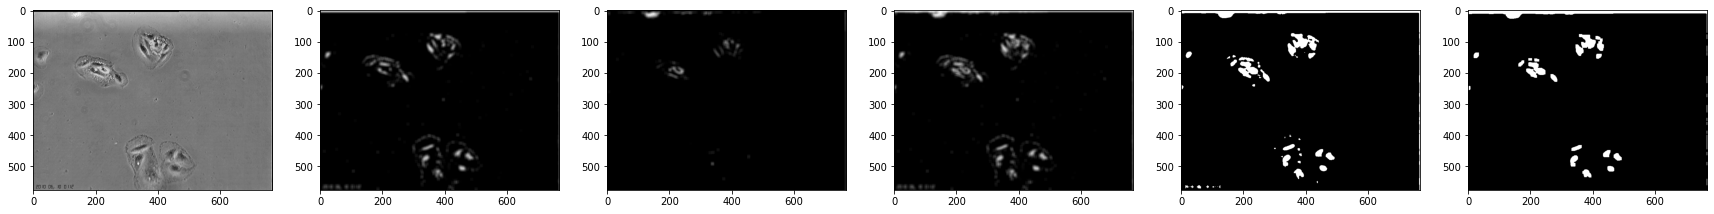

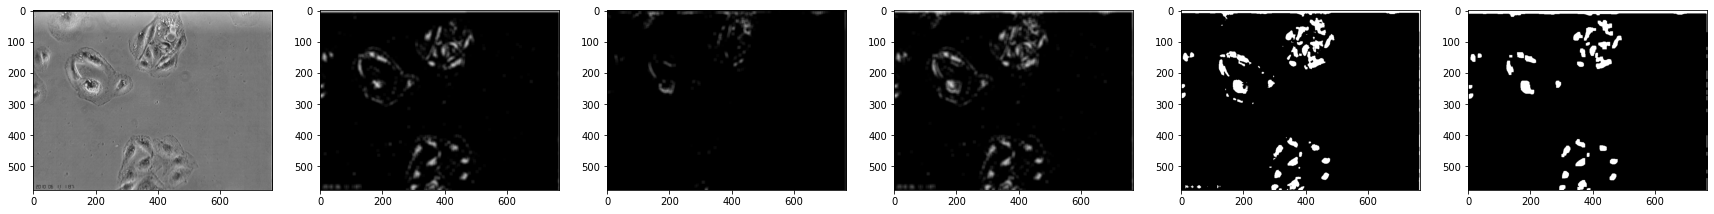

In [182]:
#Dark and light with different boundaries

for ImageName in TestImages:
  Img = cv2.cvtColor(cv2.imread(ImagePath+ImageName), cv2.COLOR_BGR2GRAY)

  #Dark treshold
  DImg = 255-Img
  ret,DImg = cv.threshold(DImg,160,255,cv.THRESH_TOZERO)
  DImg = ((DImg/DImg[...].max()*255).astype(np.uint8))
  DImg = cv.blur(DImg, ksize = (10,10))

  #Light treshold
  LImg = Img
  ret,LImg = cv.threshold(LImg,190,255,cv.THRESH_TOZERO)
  LImg = ((LImg/LImg[...].max()*255).astype(np.uint8))
  LImg = cv.blur(LImg, ksize = (10,10))

  #Combined image
  CImg = DImg+LImg
  CImg = ((CImg/CImg[...].max()*255).astype(np.uint8))

  #Tresholding and morphology

  TImg = ((CImg>50)*255).astype(np.uint8)

  opening_kernel = np.ones((8,8),np.uint8)
  OImg = cv.morphologyEx(TImg, cv.MORPH_OPEN, opening_kernel)
  OImg = cv.morphologyEx(OImg, cv.MORPH_OPEN, opening_kernel)

  plt.figure(figsize=(30,5))
  plt.subplot(1,6,1)
  plt.imshow(Img, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,6,2)
  plt.imshow(DImg, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,6,3)
  plt.imshow(LImg, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,6,4)
  plt.imshow(CImg, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,6,5)
  plt.imshow(TImg, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,6,6)
  plt.imshow(OImg, cmap='gray', vmin=0, vmax=255)


In [185]:
def center_mass(img):
  M = cv.moments(img)
  cX = int(M["m10"] / M["m00"])
  cY = int(M["m01"] / M["m00"])
  centre = [cX,cY]

  return centre

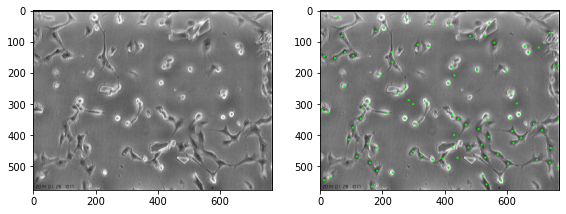

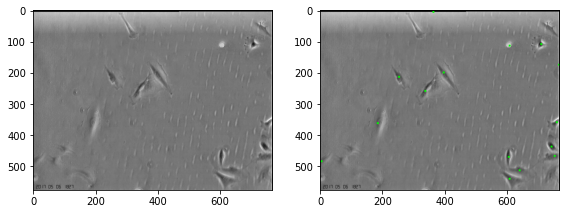

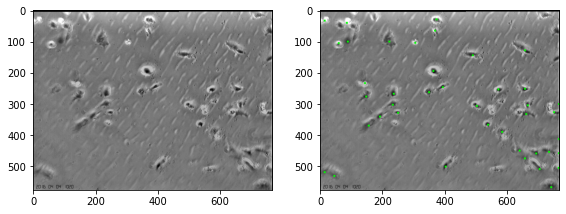

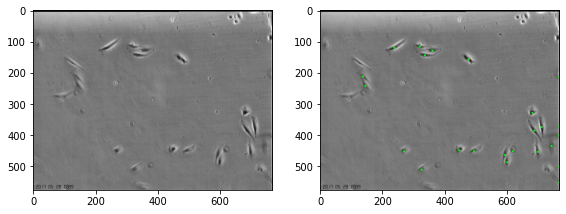

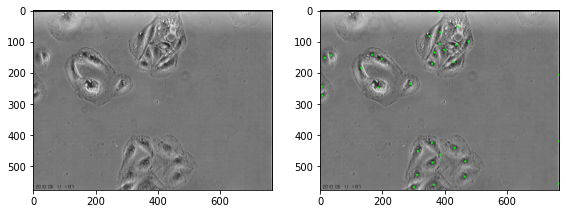

In [193]:
#Dark and light with different boundaries

MinCellSize = 100
MaxCellSize = 10000
Clocksize = [140,25]

for ImageName in TestImages:
  Img = cv2.cvtColor(cv2.imread(ImagePath+ImageName), cv2.COLOR_BGR2GRAY)
  H,W = Img.shape

  #Dark treshold
  DImg = 255-Img
  ret,DImg = cv.threshold(DImg,160,255,cv.THRESH_TOZERO)
  DImg = ((DImg/DImg[...].max()*255).astype(np.uint8))
  DImg = cv.blur(DImg, ksize = (10,10))

  #Light treshold
  LImg = Img
  ret,LImg = cv.threshold(LImg,190,255,cv.THRESH_TOZERO)
  LImg = ((LImg/LImg[...].max()*255).astype(np.uint8))
  LImg = cv.blur(LImg, ksize = (10,10))

  #Combined image
  CImg = DImg+LImg
  CImg = ((CImg/CImg[...].max()*255).astype(np.uint8))

  #Tresholding and morphology

  TImg = ((CImg>50)*255).astype(np.uint8)

  opening_kernel = np.ones((8,8),np.uint8)
  OImg = cv.morphologyEx(TImg, cv.MORPH_OPEN, opening_kernel)
  OImg = cv.morphologyEx(OImg, cv.MORPH_OPEN, opening_kernel)

  #################################

  ret0, labels = cv.connectedComponents(OImg)
  numCells = np.max(np.max(labels));

  cells = np.zeros((numCells,H,W))

  for cnum in range(numCells):
    clabel = np.array(labels)
    clabel[clabel!=cnum]=0
    clabel[clabel==cnum]=1
    cells[cnum]=clabel

  #------------ Marking invalid elements ------------

  invalid_cells = set()
  for element in range(numCells):
    if sum(sum(cells[element]))<MinCellSize or sum(sum(cells[element]))>MaxCellSize:
      invalid_cells.add(element)

  #------------ Center mass instead of Peeling ------------
  
  #PrevCentres = Centres
  Centres = []
  for element in range(numCells):
    if not element in invalid_cells:
      Current_center = center_mass(cells[element])
      if Current_center[1]<H-Clocksize[1] or Current_center[0]>Clocksize[0]:
        Centres.append(Current_center)

  #################################
  CentresImage = cv2.cvtColor(Img, cv2.COLOR_GRAY2BGR)
  for Centre in Centres:
    CentresImage[
                  max([int(Centre[1])-3,0]):
                  min([int(Centre[1])+3,H]),
                  max([int(Centre[0])-3,0]):
                  min([int(Centre[0])+3,W])
                  ]=(0,255,0)



  plt.figure(figsize=(30,5))
  plt.subplot(1,6,1)
  plt.imshow(Img, cmap='gray', vmin=0, vmax=255)
  plt.subplot(1,6,2)
  plt.imshow(CentresImage)

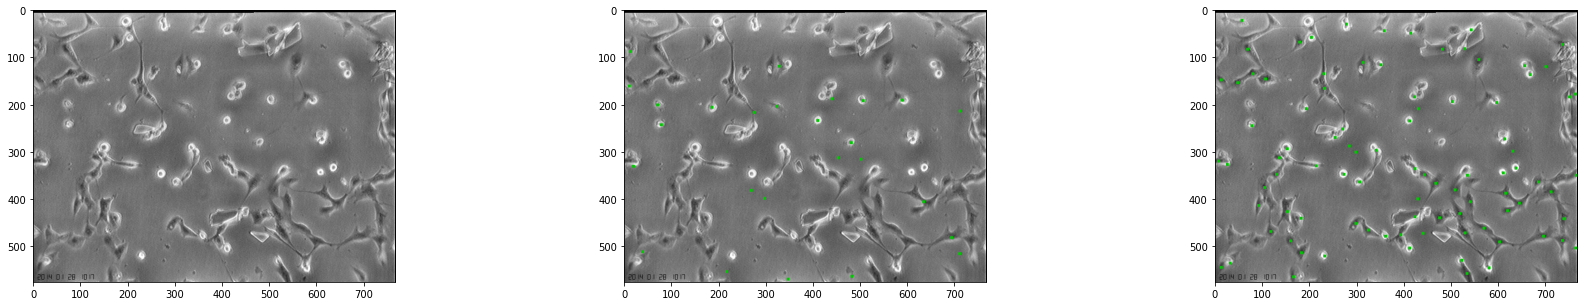

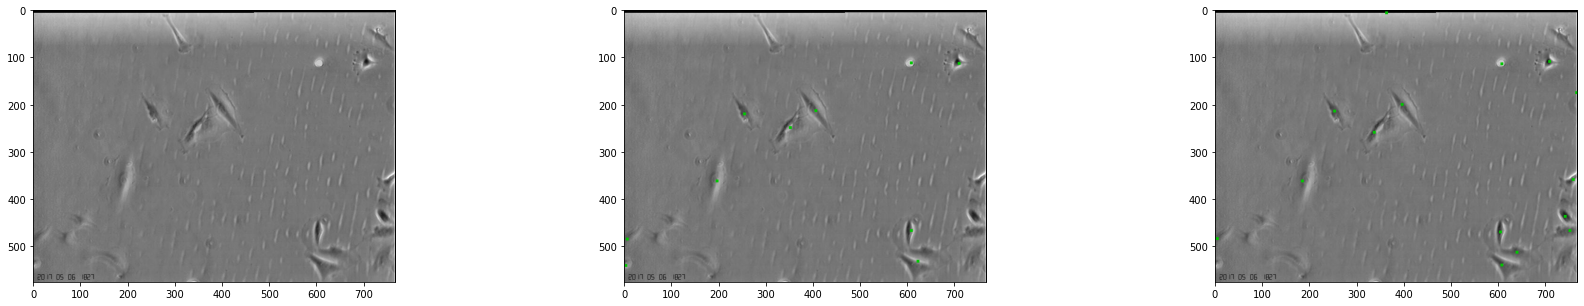

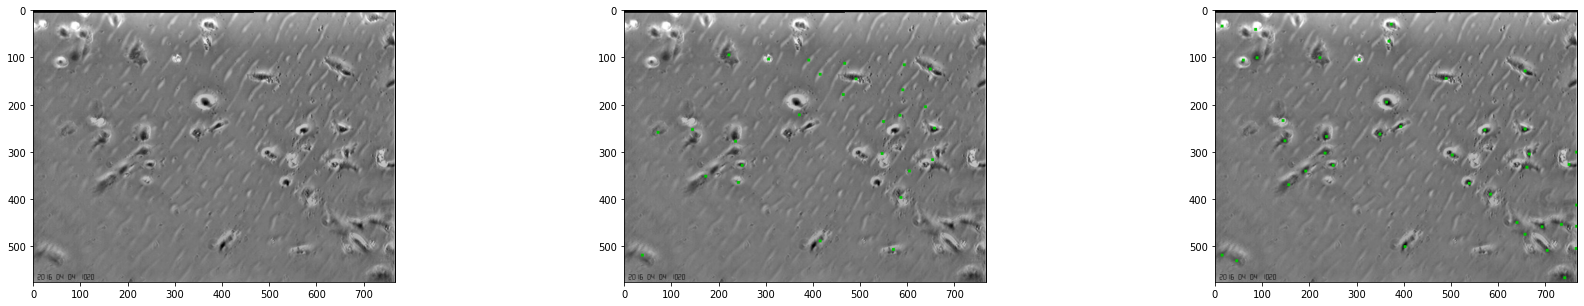

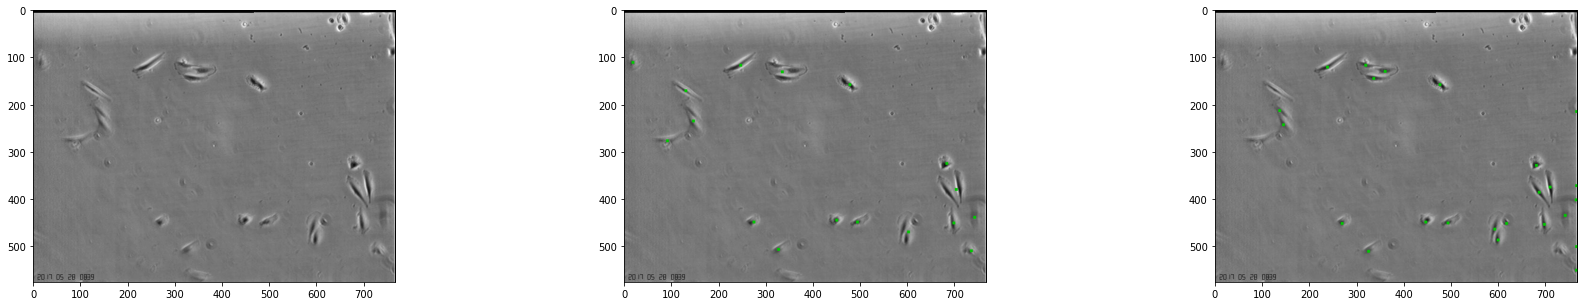

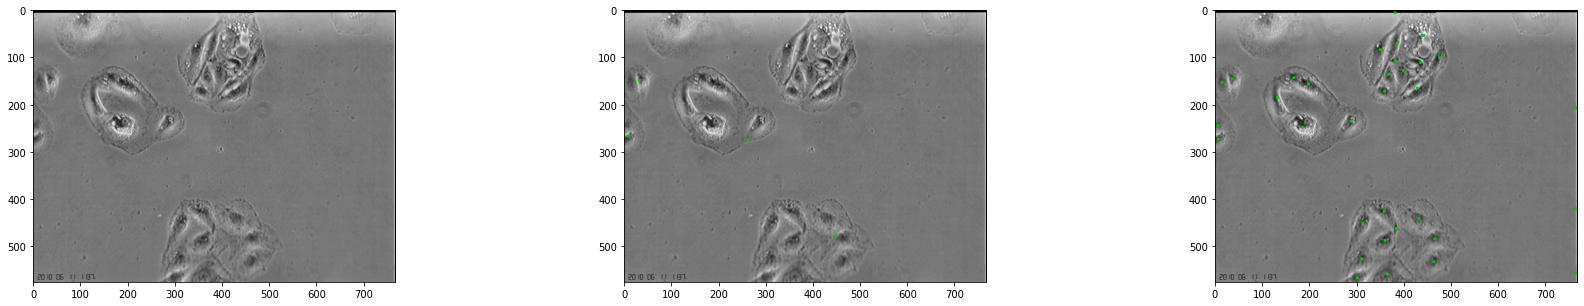

In [197]:
#Comparison of methods

MinCellSize = 100
MaxCellSize = 10000
Clocksize = [140,25]

for ImageName in TestImages:
  Img = cv2.cvtColor(cv2.imread(ImagePath+ImageName), cv2.COLOR_BGR2GRAY)
  H,W = Img.shape

  plt.figure(figsize=(30,5))
  plt.subplot(1,3,1)
  plt.imshow(Img, cmap='gray', vmin=0, vmax=255)

  #########################################################################################################

  tresh = ((1-(Img < 150)*(Img>100))*255).astype(np.uint8)  #band cut treshold
    
  closing_kernel = np.ones((10,10),np.uint8)
  opening_kernel = np.ones((4,4),np.uint8)
  
  closed = cv.morphologyEx(tresh, cv.MORPH_CLOSE, closing_kernel)
  opened = cv.morphologyEx(closed, cv.MORPH_OPEN, opening_kernel)
  opened = cv.morphologyEx(opened, cv.MORPH_OPEN, opening_kernel)
  
  blurred = cv.medianBlur(opened, 11)
  
  #------------ Black and White labeling ------------

  ret0, labels = cv.connectedComponents(blurred)
  

  numCells = np.max(np.max(labels));

  cells = np.zeros((numCells,H,W))

  for cnum in range(numCells):
    clabel = np.array(labels)
    clabel[clabel!=cnum]=0
    clabel[clabel==cnum]=1
    cells[cnum]=clabel


  #print("BWlabel: "+str(time.time()-Timer))
  #Timer = time.time()

  #------------ Marking invalid elements ------------

  invalid_cells = set()
  for element in range(numCells):
    if sum(sum(cells[element]))<MinCellSize or sum(sum(cells[element]))>MaxCellSize:
      invalid_cells.add(element)

  #------------ Center mass instead of Peeling ------------
  
  Centres = []
  for element in range(numCells):
    if not element in invalid_cells:
      Current_center = center_mass(cells[element])
      if Current_center[1]<H-Clocksize[1] or Current_center[0]>Clocksize[0]:
        Centres.append(Current_center)

  CentresImg = cv2.cvtColor(Img, cv2.COLOR_GRAY2BGR)
  for Centre in Centres:
    CentresImg[
                  max([int(Centre[1])-3,0]):
                  min([int(Centre[1])+3,H]),
                  max([int(Centre[0])-3,0]):
                  min([int(Centre[0])+3,W])
                  ]=(0,200,0)

  plt.subplot(1,3,2)
  plt.imshow(CentresImg)


  #########################################################################################################

  #Dark treshold
  DImg = 255-Img
  ret,DImg = cv.threshold(DImg,160,255,cv.THRESH_TOZERO)
  DImg = ((DImg/DImg[...].max()*255).astype(np.uint8))
  DImg = cv.blur(DImg, ksize = (10,10))

  #Light treshold
  LImg = Img
  ret,LImg = cv.threshold(LImg,190,255,cv.THRESH_TOZERO)
  LImg = ((LImg/LImg[...].max()*255).astype(np.uint8))
  LImg = cv.blur(LImg, ksize = (10,10))

  #Combined image
  CImg = DImg+LImg
  CImg = ((CImg/CImg[...].max()*255).astype(np.uint8))

  #Tresholding and morphology

  TImg = ((CImg>50)*255).astype(np.uint8)

  opening_kernel = np.ones((8,8),np.uint8)
  OImg = cv.morphologyEx(TImg, cv.MORPH_OPEN, opening_kernel)
  OImg = cv.morphologyEx(OImg, cv.MORPH_OPEN, opening_kernel)

  #################################

  ret0, labels = cv.connectedComponents(OImg)
  numCells = np.max(np.max(labels));

  cells = np.zeros((numCells,H,W))

  for cnum in range(numCells):
    clabel = np.array(labels)
    clabel[clabel!=cnum]=0
    clabel[clabel==cnum]=1
    cells[cnum]=clabel

  #------------ Marking invalid elements ------------

  invalid_cells = set()
  for element in range(numCells):
    if sum(sum(cells[element]))<MinCellSize or sum(sum(cells[element]))>MaxCellSize:
      invalid_cells.add(element)

  #------------ Center mass instead of Peeling ------------
  
  #PrevCentres = Centres
  Centres = []
  for element in range(numCells):
    if not element in invalid_cells:
      Current_center = center_mass(cells[element])
      if Current_center[1]<H-Clocksize[1] or Current_center[0]>Clocksize[0]:
        Centres.append(Current_center)

  #################################
  CentresImg = cv2.cvtColor(Img, cv2.COLOR_GRAY2BGR)
  for Centre in Centres:
    CentresImg[
                  max([int(Centre[1])-3,0]):
                  min([int(Centre[1])+3,H]),
                  max([int(Centre[0])-3,0]):
                  min([int(Centre[0])+3,W])
                  ]=(0,200,0)



  
  plt.subplot(1,3,3)
  plt.imshow(CentresImg)